In [ ]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("/content/indian_liver_patient.csv")
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
dataset.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [ ]:
dataset['Gender'].replace(['Female','Male'],[0,1],inplace=True)

In [ ]:
dataset=dataset.drop_duplicates()

In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [ ]:
from sklearn.impute import IterativeImputer


# Setting the random_state argument for reproducibility
imputer = IterativeImputer(random_state=42)
imputed = imputer.fit_transform(dataset)
df_imputed = pd.DataFrame(imputed, columns=dataset.columns)

round(df_imputed, 2)
dataset=df_imputed

In [ ]:
Dataset_data = dataset['Dataset']
gender_data = dataset['Gender']
dropped_columns = [ 'Gender', 'Dataset']
dataset = dataset.drop(dropped_columns, axis=1)
dataset

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90
1,62.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74
2,62.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89
3,58.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00
4,72.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...
565,60.0,0.5,0.1,500.0,20.0,34.0,5.9,1.6,0.37
566,40.0,0.6,0.1,98.0,35.0,31.0,6.0,3.2,1.10
567,52.0,0.8,0.2,245.0,48.0,49.0,6.4,3.2,1.00
568,31.0,1.3,0.5,184.0,29.0,32.0,6.8,3.4,1.00


In [ ]:
Age_data = dataset['Age']

Totalprotiens_data = dataset['Total_Protiens']
Albumin_data = dataset['Albumin']
dropped_columns = ['Age','Total_Protiens','Albumin']
dataset = dataset.drop(dropped_columns, axis=1)
dataset

,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Albumin_and_Globulin_Ratio
0,0.7,0.1,187.0,16.0,18.0,0.90
1,10.9,5.5,699.0,64.0,100.0,0.74
2,7.3,4.1,490.0,60.0,68.0,0.89
3,1.0,0.4,182.0,14.0,20.0,1.00
4,3.9,2.0,195.0,27.0,59.0,0.40
...,...,...,...,...,...,...
565,0.5,0.1,500.0,20.0,34.0,0.37
566,0.6,0.1,98.0,35.0,31.0,1.10
567,0.8,0.2,245.0,48.0,49.0,1.00
568,1.3,0.5,184.0,29.0,32.0,1.00


Total_Bilirubin                4.856635
Direct_Bilirubin               3.179290
Alkaline_Phosphotase           3.718587
Alamine_Aminotransferase       6.677423
Aspartate_Aminotransferase    10.531610
Albumin_and_Globulin_Ratio     0.987467
dtype: float64
     Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0           0.530628          0.095310              5.236442   
1           2.476538          1.871802              6.551080   
2           2.116256          1.629241              6.196444   
3           0.693147          0.336472              5.209486   
4           1.589235          1.098612              5.278115   
..               ...               ...                   ...   
565         0.405465          0.095310              6.216606   
566         0.470004          0.095310              4.595120   
567         0.587787          0.182322              5.505332   
568         0.832909          0.405465              5.220356   
569         0.693147          0.262364   

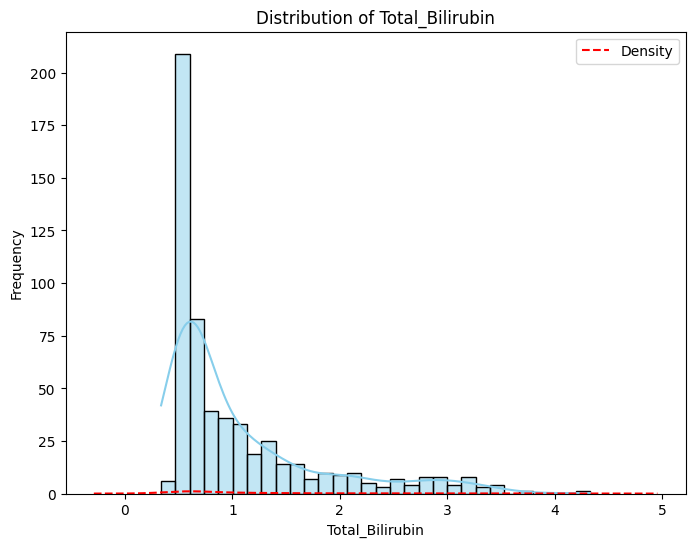

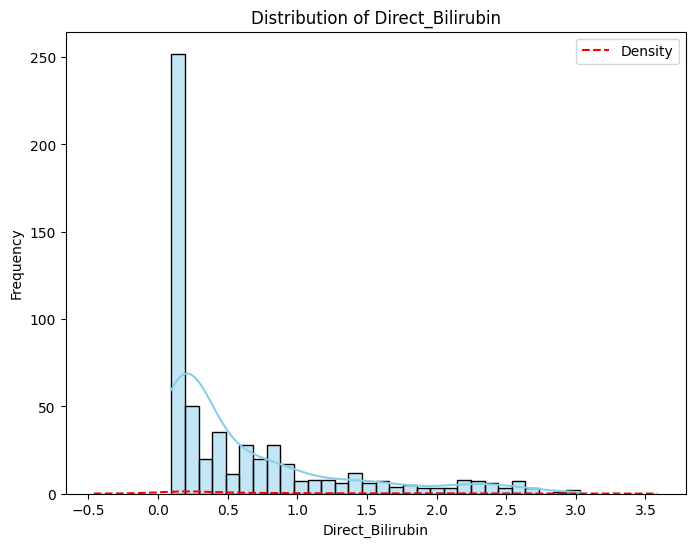

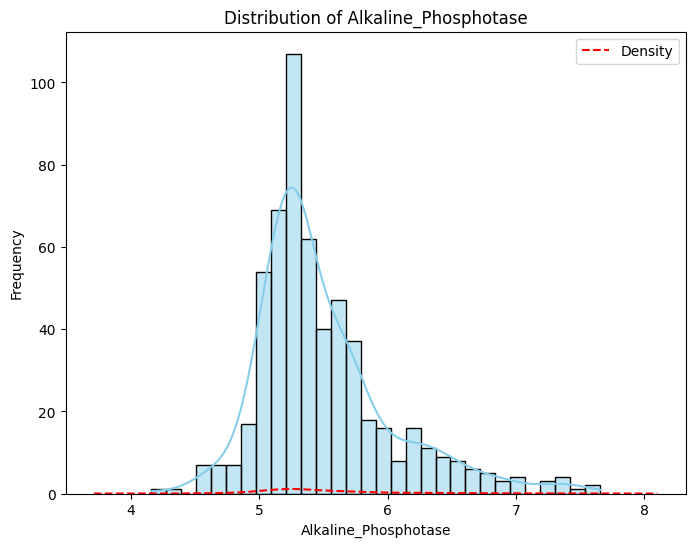

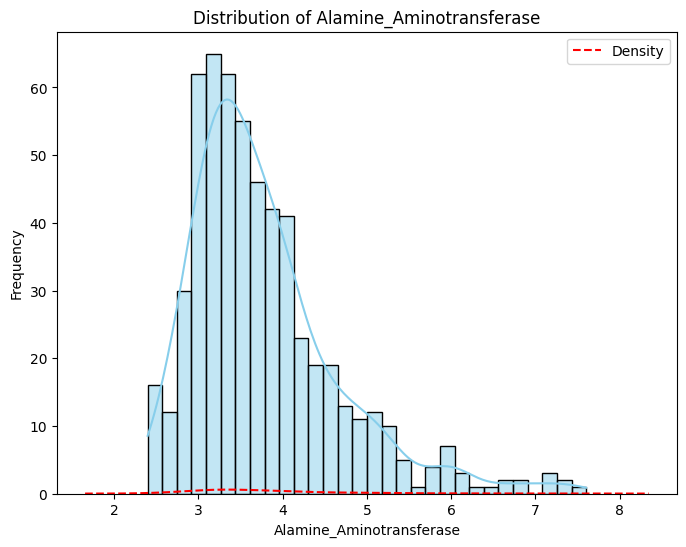

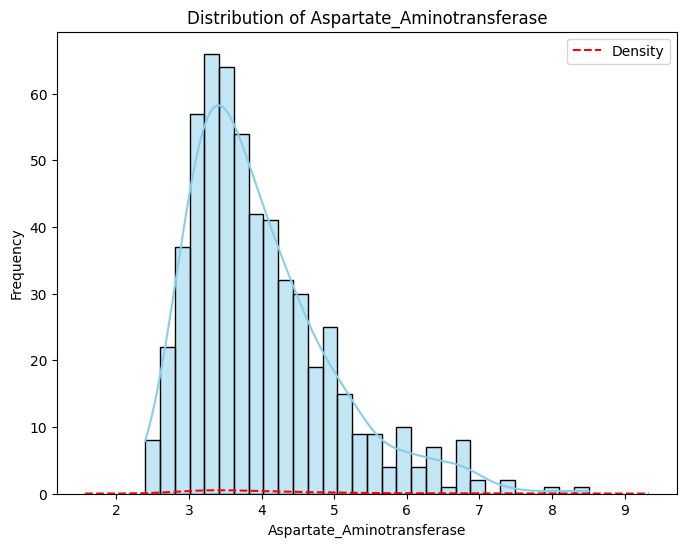

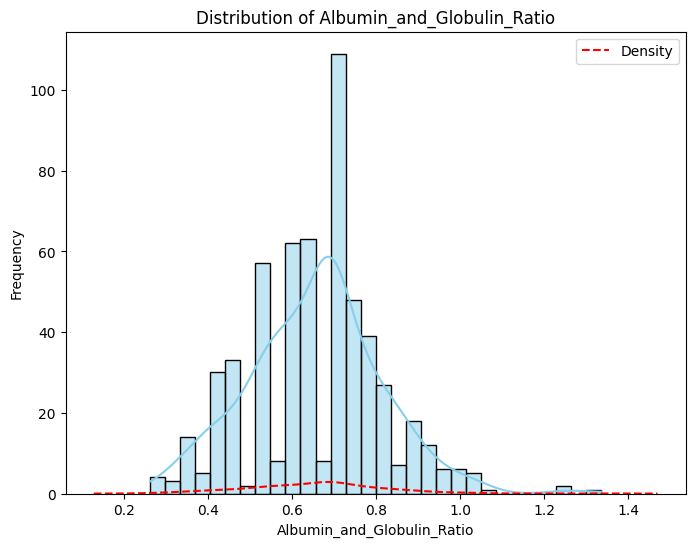

In [ ]:
# Load the required libraries
from scipy.stats import skew
# Check the skewness of the data
skewness = dataset.apply(lambda x: skew(x.dropna()))
print(skewness)

# Transform the skewed data using the log transformation
transformed_data = dataset.copy()
for column in dataset.columns:
    if pd.api.types.is_numeric_dtype(dataset[column]):
        if skew(dataset[column].dropna()) > 0.5:
            transformed_data[column] = np.log1p(dataset[column].dropna())

# Check the transformed data
print(transformed_data)
dataset=transformed_data


# Visualize the transformed data with density plots
for column in transformed_data.columns:
    if pd.api.types.is_numeric_dtype(transformed_data[column]):
        plt.figure(figsize=(8, 6))
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        sns.histplot(transformed_data[column], kde=True, color='skyblue', bins=30)
        # Add density plot
        sns.kdeplot(transformed_data[column], color='red', linestyle='dashed', label='Density')

        plt.legend()
        plt.show()


In [ ]:
dataset.isna().sum()

Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Albumin_and_Globulin_Ratio    0
dtype: int64

In [ ]:
dataset['Gender'] = gender_data
dataset['Dataset'] = Dataset_data
dataset['Age'] = Age_data
dataset['Total_Protiens'] = Totalprotiens_data
dataset['Albumin'] = Albumin_data

In [ ]:
dataset

,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Albumin_and_Globulin_Ratio,Gender,Dataset,Age,Total_Protiens,Albumin
0,0.530628,0.095310,5.236442,2.833213,2.944439,0.641854,0.0,1.0,65.0,6.8,3.3
1,2.476538,1.871802,6.551080,4.174387,4.615121,0.553885,1.0,1.0,62.0,7.5,3.2
2,2.116256,1.629241,6.196444,4.110874,4.234107,0.636577,1.0,1.0,62.0,7.0,3.3
3,0.693147,0.336472,5.209486,2.708050,3.044522,0.693147,1.0,1.0,58.0,6.8,3.4
4,1.589235,1.098612,5.278115,3.332205,4.094345,0.336472,1.0,1.0,72.0,7.3,2.4
...,...,...,...,...,...,...,...,...,...,...,...
565,0.405465,0.095310,6.216606,3.044522,3.555348,0.314811,1.0,2.0,60.0,5.9,1.6
566,0.470004,0.095310,4.595120,3.583519,3.465736,0.741937,1.0,1.0,40.0,6.0,3.2
567,0.587787,0.182322,5.505332,3.891820,3.912023,0.693147,1.0,1.0,52.0,6.4,3.2
568,0.832909,0.405465,5.220356,3.401197,3.496508,0.693147,1.0,1.0,31.0,6.8,3.4


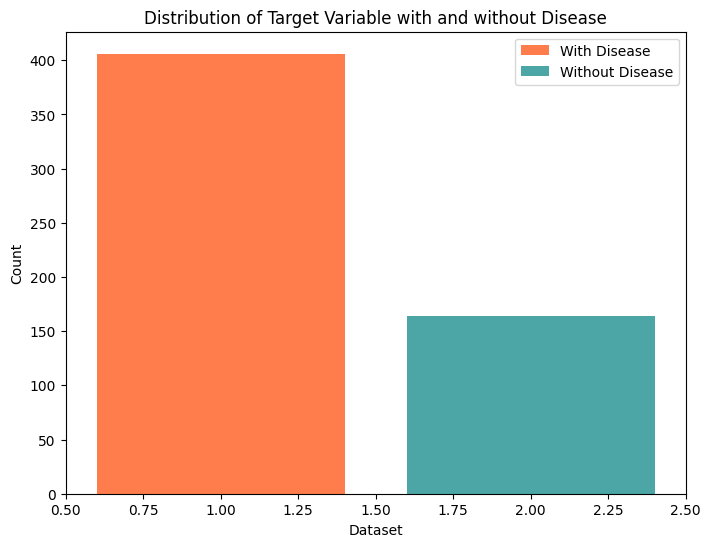

In [ ]:
# Load the required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Dataset' is the name of your target variable column
# Create separate datasets for samples with and without disease
with_disease = dataset[dataset['Dataset'] == 1]
without_disease = dataset[dataset['Dataset'] == 2]

# Define the width of the bars
bar_width = 0.3  # Adjust this value according to your preference

# Plot histograms for each dataset
plt.figure(figsize=(8, 6))

# Plot with disease
sns.histplot(with_disease['Dataset'], color='orangered', label='With Disease', bins=2, discrete=True, alpha=0.7, stat='count', kde=False, linewidth=0, element='bars', common_norm=False, common_bins=False, shrink=0.8, binwidth=bar_width)

# Plot without disease with a gap
sns.histplot(without_disease['Dataset'], color='teal', label='Without Disease', bins=2, discrete=True, alpha=0.7, stat='count', kde=False, linewidth=0, element='bars', common_norm=False, common_bins=False, shrink=0.8, binwidth=bar_width)

# Adjust x-axis limits to create a small gap between bars
plt.xlim(0.5, 2.5)

plt.xlabel('Dataset')
plt.ylabel('Count')
plt.title('Distribution of Target Variable with and without Disease')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.utils import resample

# Load the dataset
# Separate majority and minority classes
df_majority = dataset[dataset['Dataset'] == 1]  # Records with liver disease
df_minority = dataset[dataset['Dataset'] == 2]  # Records without liver disease

# Upsample minority class to match the number of records in the majority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # Sample with replacement
                                 n_samples=len(df_majority),    # Match the number of records in the majority class
                                 random_state=42)  # Set random state for reproducibility

# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the dataframe
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Now df_balanced contains a balanced dataset with equal number of records for each class


In [ ]:
dataset=df_balanced
dataset.shape
dataset.isna().sum()

Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Albumin_and_Globulin_Ratio    0
Gender                        0
Dataset                       0
Age                           0
Total_Protiens                0
Albumin                       0
dtype: int64

In [ ]:
dataset.duplicated().sum()

263

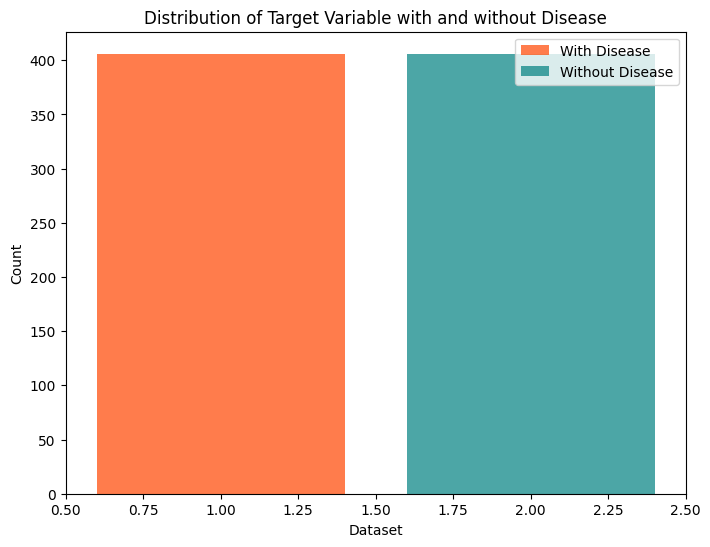

In [ ]:
# Load the required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Dataset' is the name of your target variable column
# Create separate datasets for samples with and without disease
with_disease = dataset[dataset['Dataset'] == 1]
without_disease = dataset[dataset['Dataset'] == 2]

# Define the width of the bars
bar_width = 0.3  # Adjust this value according to your preference

# Plot histograms for each dataset
plt.figure(figsize=(8, 6))

# Plot with disease
sns.histplot(with_disease['Dataset'], color='orangered', label='With Disease', bins=2, discrete=True, alpha=0.7, stat='count', kde=False, linewidth=0, element='bars', common_norm=False, common_bins=False, shrink=0.8, binwidth=bar_width)

# Plot without disease with a gap
sns.histplot(without_disease['Dataset'], color='teal', label='Without Disease', bins=2, discrete=True, alpha=0.7, stat='count', kde=False, linewidth=0, element='bars', common_norm=False, common_bins=False, shrink=0.8, binwidth=bar_width)

# Adjust x-axis limits to create a small gap between bars
plt.xlim(0.5, 2.5)

plt.xlabel('Dataset')
plt.ylabel('Count')
plt.title('Distribution of Target Variable with and without Disease')
plt.legend()
plt.show()


In [ ]:
Dataset_data = dataset['Dataset']
gender_data = dataset['Gender']
dropped_columns = [ 'Gender', 'Dataset']
dataset = dataset.drop(dropped_columns, axis=1)
dataset

,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Albumin_and_Globulin_Ratio,Age,Total_Protiens,Albumin
0,0.587787,0.182322,5.017280,3.258097,3.178054,0.693147,48.0,7.5,3.9
1,0.470004,0.182322,4.615121,2.890372,5.003946,1.064711,66.0,5.0,3.3
2,1.098612,0.641854,5.062595,4.007333,4.234107,0.587787,26.0,6.1,2.7
3,0.788457,0.405465,5.509388,3.555348,3.761200,0.678034,41.0,6.9,3.4
4,0.530628,0.182322,5.472271,2.944439,3.367296,0.559616,70.0,5.8,2.5
...,...,...,...,...,...,...,...,...,...
807,0.470004,0.095310,5.583496,4.584967,5.087596,0.741937,18.0,5.9,3.1
808,0.641854,0.262364,6.137727,4.262680,4.418841,0.693147,32.0,6.2,3.1
809,1.308333,0.832909,6.364751,4.962845,4.234107,0.693147,41.0,8.0,4.0
810,0.587787,0.182322,5.293305,3.295837,3.178054,0.693147,33.0,8.0,4.0


   Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0        -0.108353          0.000000             -0.527074   
1        -0.344395          0.000000             -1.295003   
2         0.915364          1.133346             -0.440544   
3         0.293800          0.550340              0.412615   
4        -0.222901          0.000000              0.341738   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  \
0                 -0.231239                   -0.367504   
1                 -0.640759                    1.411011   
2                  0.603154                    0.661146   
3                  0.099797                    0.200511   
4                 -0.580547                   -0.183173   

   Albumin_and_Globulin_Ratio       Age  Total_Protiens   Albumin  
0                    0.000000  0.198020        0.730769  0.636364  
1                    2.410392  0.910891       -1.192308  0.090909  
2                   -0.683490 -0.673267       -0.346154 -0.454545  


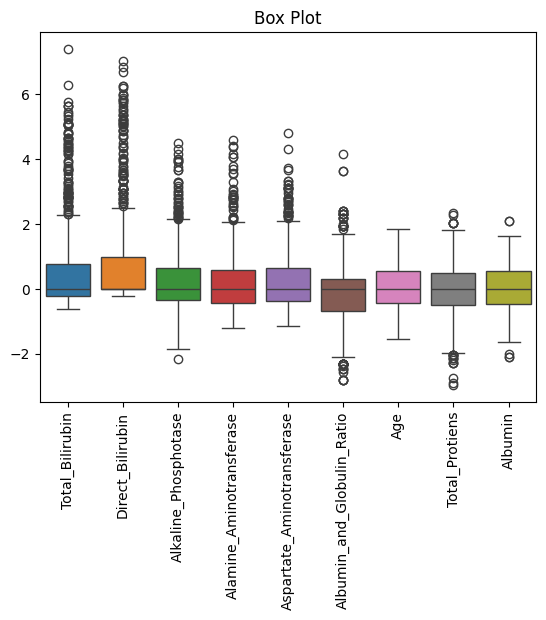

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(dataset)

# Convert the scaled data back to a DataFrame (optional)
scaled_dfr = pd.DataFrame(scaled_data, columns=dataset.columns)

# Display the scaled DataFrame
print(scaled_dfr.head())


# Load liver dataset


# Visual Inspection: Box Plot
sns.boxplot(data=scaled_dfr)
plt.title('Box Plot')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

In [ ]:
scaled_dfr.shape

(812, 9)

In [ ]:
scaled_dfr['Gender'] = gender_data
scaled_dfr['Dataset'] = Dataset_data
scaled_dfr

,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Albumin_and_Globulin_Ratio,Age,Total_Protiens,Albumin,Gender,Dataset
0,-0.108353,0.000000,-0.527074,-0.231239,-0.367504,0.000000,0.198020,0.730769,0.636364,0.0,1.0
1,-0.344395,0.000000,-1.295003,-0.640759,1.411011,2.410392,0.910891,-1.192308,0.090909,1.0,2.0
2,0.915364,1.133346,-0.440544,0.603154,0.661146,-0.683490,-0.673267,-0.346154,-0.454545,1.0,1.0
3,0.293800,0.550340,0.412615,0.099797,0.200511,-0.098045,-0.079208,0.269231,0.181818,1.0,1.0
4,-0.222901,0.000000,0.341738,-0.580547,-0.183173,-0.866239,1.069307,-0.576923,-0.636364,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
807,-0.344395,-0.214596,0.554125,1.246441,1.492490,0.316510,-0.990099,-0.500000,-0.090909,1.0,1.0
808,0.000000,0.197410,1.612437,0.887523,0.841087,0.000000,-0.435644,-0.269231,-0.090909,1.0,1.0
809,1.335653,1.604546,2.045943,1.667267,0.661146,0.000000,-0.079208,1.115385,0.727273,1.0,1.0
810,-0.108353,0.000000,0.000000,-0.189209,-0.367504,0.000000,-0.396040,1.115385,0.727273,1.0,2.0


Chi-square statistic: 2.3789319915598117, p-value: 0.12298159940948424
F-statistic for Total_Bilirubin: 155.24999710742216, p-value: 9.975403328792664e-33
F-statistic for Direct_Bilirubin: 161.56628943629428, p-value: 6.991629811653418e-34
F-statistic for Alkaline_Phosphotase: 81.80580640183035, p-value: 1.0917565822424842e-18
F-statistic for Alamine_Aminotransferase: 118.93533200937453, p-value: 6.203604282929646e-26
F-statistic for Aspartate_Aminotransferase: 135.59582669683454, p-value: 4.383700861320707e-29
F-statistic for Albumin_and_Globulin_Ratio: 34.51649089281127, p-value: 6.169332025890132e-09
F-statistic for Age: 19.30518613183439, p-value: 1.2621034558377446e-05
F-statistic for Total_Protiens: 1.1997203909165632, p-value: 0.27370314108886284
F-statistic for Albumin: 25.736009731144986, p-value: 4.85641505387576e-07
F-statistic for Gender: inf, p-value: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


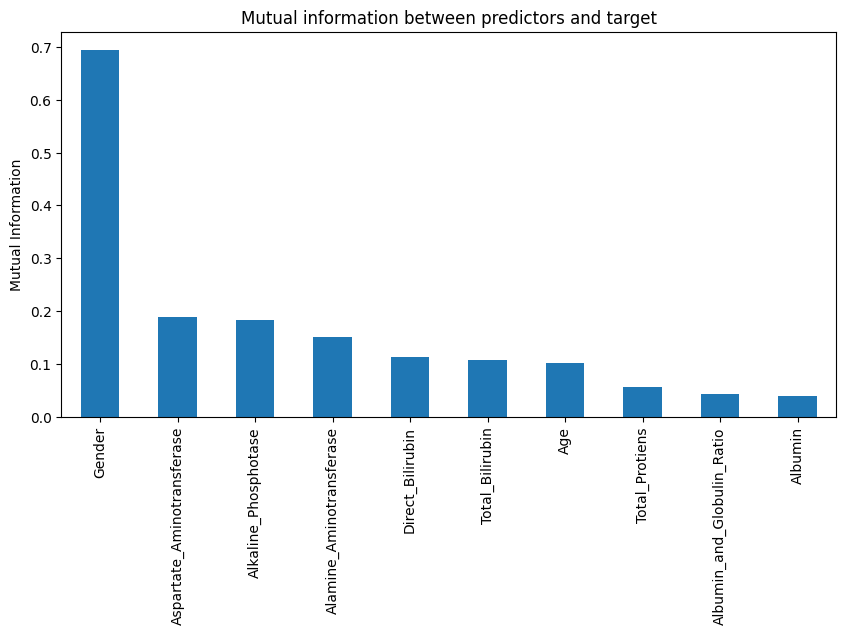

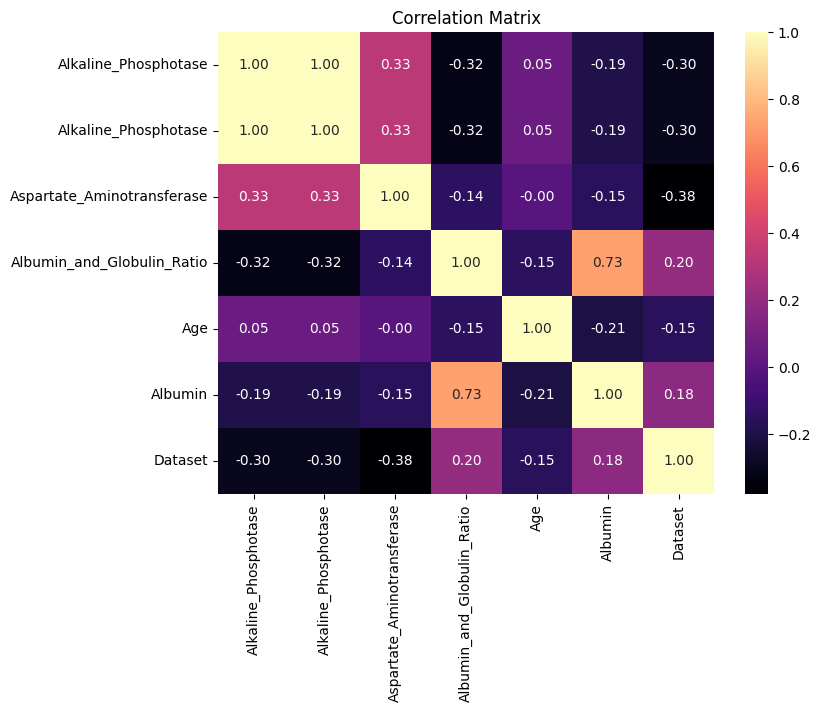

,Alkaline_Phosphotase,Alkaline_Phosphotase,Aspartate_Aminotransferase,Albumin_and_Globulin_Ratio,Age,Albumin,Dataset
0,-0.527074,-0.527074,-0.367504,0.000000,0.198020,0.636364,1.0
1,-1.295003,-1.295003,1.411011,2.410392,0.910891,0.090909,2.0
2,-0.440544,-0.440544,0.661146,-0.683490,-0.673267,-0.454545,1.0
3,0.412615,0.412615,0.200511,-0.098045,-0.079208,0.181818,1.0
4,0.341738,0.341738,-0.183173,-0.866239,1.069307,-0.636364,2.0
...,...,...,...,...,...,...,...
807,0.554125,0.554125,1.492490,0.316510,-0.990099,-0.090909,1.0
808,1.612437,1.612437,0.841087,0.000000,-0.435644,-0.090909,1.0
809,2.045943,2.045943,0.661146,0.000000,-0.079208,0.727273,1.0
810,0.000000,0.000000,-0.367504,0.000000,-0.396040,0.727273,2.0


In [ ]:
import scipy.stats as stats
from scipy.stats import chi2_contingency, f_oneway
from sklearn.feature_selection import mutual_info_classif, f_classif

# Assuming the dataset is stored in a pandas DataFrame called 'df'
# and the target variable is stored in a pandas Series called 'target'

# Perform chi-square test for gender feature
chi2_stat, p_val, dof, ex = stats.chi2_contingency(pd.crosstab(scaled_dfr.Gender,scaled_dfr.Dataset))
print(f"Chi-square statistic: {chi2_stat}, p-value: {p_val}")

# Perform f-test for numerical features
f_stat, p_val = f_classif(scaled_dfr.drop('Gender', axis=1),scaled_dfr.Dataset)
for i, j in enumerate(f_stat):
    print(f"F-statistic for {scaled_dfr.columns[i]}: {j}, p-value: {p_val[i]}")
# Perform f-test for numerical features
f_scores = f_oneway(*[scaled_dfr[feature] for feature in scaled_dfr.select_dtypes(include=['float64', 'int64']).columns])

# Perform mutual information test for all features
mi_scores = mutual_info_classif(scaled_dfr.drop(['Gender', 'Dataset'], axis=1), scaled_dfr['Dataset'])

# Perform mutual information test for feature selection
mi = mutual_info_classif(scaled_dfr.drop('Gender', axis=1), scaled_dfr.Dataset)
mi_df = pd.Series(mi, index=scaled_dfr.columns[:-1])
mi_df.sort_values(ascending=False).plot.bar(figsize=(10, 5))
plt.ylabel('Mutual Information')
plt.title("Mutual information between predictors and target")
plt.show()

chi2_threshold = 0.05
f_threshold = 0.05
mi_threshold = 0.1
features_to_keep = []
for feature, p_value in enumerate(f_scores):
    if p_value > f_threshold:
        features_to_keep.append(scaled_dfr.columns[feature+2])
for feature, score in enumerate(mi_scores):
    if score > mi_threshold:
        features_to_keep.append(scaled_dfr.columns[feature+2])

# Create the final dataset by keeping only the selected features
final_data = scaled_dfr[features_to_keep + ['Dataset']]




import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = final_data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()
final_data

In [ ]:
features=['Alkaline_Phosphotase','Aspartate_Aminotransferase','Alamine_Aminotransferase','Albumin_and_Globulin_Ratio', 'Age', 'Dataset']
df=scaled_dfr[features].copy()
df

,Alkaline_Phosphotase,Aspartate_Aminotransferase,Alamine_Aminotransferase,Albumin_and_Globulin_Ratio,Age,Dataset
0,-0.527074,-0.367504,-0.231239,0.000000,0.198020,1.0
1,-1.295003,1.411011,-0.640759,2.410392,0.910891,2.0
2,-0.440544,0.661146,0.603154,-0.683490,-0.673267,1.0
3,0.412615,0.200511,0.099797,-0.098045,-0.079208,1.0
4,0.341738,-0.183173,-0.580547,-0.866239,1.069307,2.0
...,...,...,...,...,...,...
807,0.554125,1.492490,1.246441,0.316510,-0.990099,1.0
808,1.612437,0.841087,0.887523,0.000000,-0.435644,1.0
809,2.045943,0.661146,1.667267,0.000000,-0.079208,1.0
810,0.000000,-0.367504,-0.189209,0.000000,-0.396040,2.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import roc_auc_score
X2=df.drop('Dataset', axis=1)
y2_transformed=df['Dataset']

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y2= lab.fit_transform(y2_transformed)

#view transformed values
print(y2_transformed)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=42)


0      1.0
1      2.0
2      1.0
3      1.0
4      2.0
      ... 
807    1.0
808    1.0
809    1.0
810    2.0
811    1.0
Name: Dataset, Length: 812, dtype: float64


Accuracy of new model: 0.8711656441717791
[[69 17]
 [ 4 73]]
Precision Score: 0.8111111111111111
Recall Score: 0.948051948051948
F1 Score: 0.874251497005988
ROC AUC score: 0.8751887647236484
Cross validation scores: [0.82926829 0.84146341 0.88888889 0.86419753 0.87654321 0.81481481
 0.87654321 0.77777778 0.86419753 0.90123457]
Mean cross validation score: 0.853492923818127


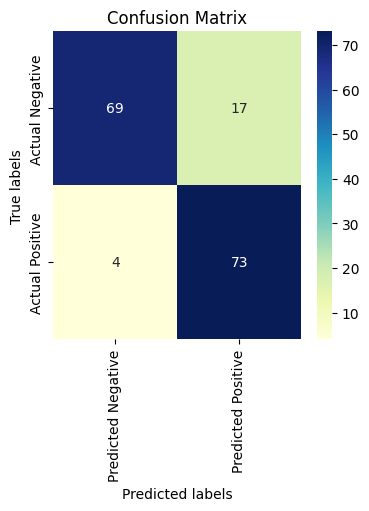

In [ ]:
rf=RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=None, random_state=42)
rf.fit(X2_train,y2_train)
# Make predictions on the testing set
y1_pred=rf.predict(X2_test)

# Calculate the accuracy of the classifier
accuracy1 = accuracy_score(y2_test, y1_pred)
print("Accuracy of new model:", accuracy1)

conf_matrix = confusion_matrix(y2_test, y1_pred)

print(conf_matrix)
precision1 = precision_score(y2_test, y1_pred)

print("Precision Score:", precision1)

# Calculate recall
recall1 = recall_score(y2_test, y1_pred)

print("Recall Score:", recall1 )

# Calculate F1-score
f1r = f1_score(y2_test, y1_pred)
print("F1 Score:", f1r)
roc_auc1 = roc_auc_score(y2_test, y1_pred)
print("ROC AUC score:", roc_auc1)

from sklearn.model_selection import cross_val_score

# assuming rf is your trained model and X2 and y2 are your features and labels
scores = cross_val_score(rf, X2, y2, cv=10)
print("Cross validation scores:", scores)
scores1=scores.mean()
print("Mean cross validation score:",scores1 )

plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="d",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
pip install umap-learn

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


Prediction: The person is predicted to have liver disease.
Accuracy: 0.9141104294478528
[[75 11]
 [ 3 74]]
Precision Score: 0.8705882352941177
Recall Score: 0.961038961038961
ROC AUC score: 0.9165659921473875
Cross validation scores: [0.87804878 0.90243902 0.92592593 0.90123457 0.90123457 0.92592593
 0.90123457 0.83950617 0.92592593 0.92592593]
Mean cross validation score: 0.9027401385124962
F1 Score: 0.9135802469135802


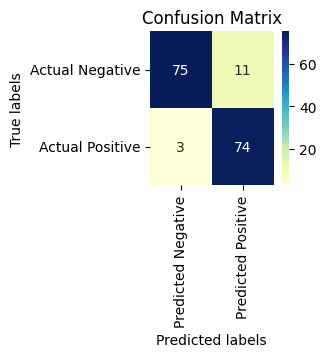

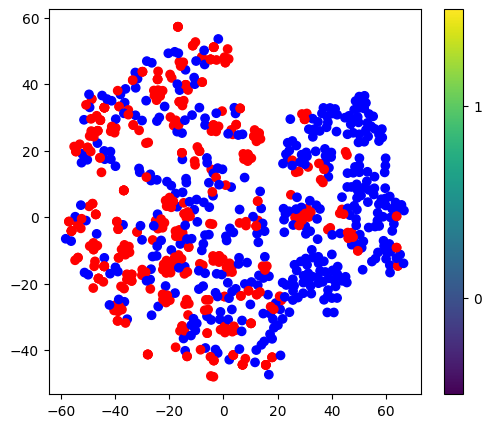

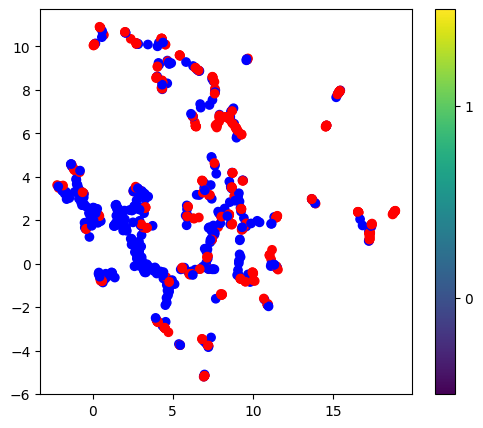

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
# Create and train ExtraTreesClassifier
extra_trees = ExtraTreesClassifier(n_estimators=100, random_state=42)



# Predictions
y_pred = extra_trees.predict(X2_test)

# Calculate accuracy
accuracy2 = accuracy_score(y2_test, y_pred)
print("Accuracy:", accuracy2)
conf_matrix = confusion_matrix(y2_test, y_pred)

print(conf_matrix)
precision2 = precision_score(y2_test, y_pred)
print("Precision Score:", precision2)

# Calculate recall
recall2 = recall_score(y2_test, y_pred)
print("Recall Score:", recall2)
roc_auc2 = roc_auc_score(y2_test, y_pred)
print("ROC AUC score:", roc_auc2)

from sklearn.model_selection import cross_val_score

# assuming rf is your trained model and X2 and y2 are your features and labels
scores = cross_val_score(extra_trees, X2, y2, cv=10)
print("Cross validation scores:", scores)
scores2=scores.mean()
print("Mean cross validation score:",scores2 )
# Calculate F1-score
f1e = f1_score(y2_test, y_pred)
print("F1 Score:", f1e)
plt.figure(figsize=(2,2))
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="d",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
importances = extra_trees.feature_importances_
labels = ['blue' if label == 0 else 'red' for label in y2]

# Create a t-SNE plot
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X2)

plt.figure(figsize=(6, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
plt.colorbar(ticks=[0, 1])
plt.clim(-0.5, 1.5)
plt.show()

# Reduce dimensionality using t-SNE
# Create a UMAP plot
umap_plot = umap.UMAP(n_neighbors=10, min_dist=0.1, metric='euclidean')
X_umap = umap_plot.fit_transform(X2)

plt.figure(figsize=(6, 5))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels)
plt.colorbar(ticks=[0, 1])
plt.clim(-0.5, 1.5)
plt.show()


Accuracy: 0.8404907975460123
[[64 22]
 [ 4 73]]
Precision Score: 0.7684210526315789
Recall Score: 0.948051948051948
F1 Score: 0.8488372093023255
ROC AUC score: 0.846118997281788
Cross validation scores: [0.80487805 0.86585366 0.82716049 0.87654321 0.87654321 0.79012346
 0.88888889 0.79012346 0.83950617 0.86419753]
Mean cross validation score: 0.842381812707016


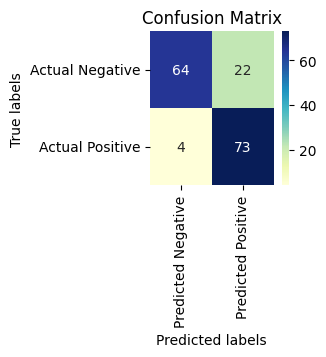

In [ ]:
 from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Create base classifier (Decision Tree)
base_classifier = DecisionTreeClassifier()

# Create BaggingClassifier
bagging_classifier = BaggingClassifier( n_estimators=100, random_state=42)

# Train BaggingClassifier
bagging_classifier.fit(X2_train, y2_train)

# Predictions
y_pred = bagging_classifier.predict(X2_test)

# Calculate accuracy
accuracy3 = accuracy_score(y2_test, y_pred)
print("Accuracy:", accuracy3)


conf_matrix = confusion_matrix(y2_test, y_pred)

print(conf_matrix)
precision3 = precision_score(y2_test, y_pred)
print("Precision Score:", precision3)

# Calculate recall
recall3 = recall_score(y2_test, y_pred)
print("Recall Score:", recall3)

# Calculate F1-score
f1b = f1_score(y2_test, y_pred)
print("F1 Score:", f1b)
roc_auc3 = roc_auc_score(y2_test, y_pred)
print("ROC AUC score:", roc_auc3)

from sklearn.model_selection import cross_val_score

# assuming rf is your trained model and X2 and y2 are your features and labels
scores = cross_val_score(bagging_classifier, X2, y2, cv=10)
print("Cross validation scores:", scores)
scores3=scores.mean()
print("Mean cross validation score:",scores3 )
plt.figure(figsize=(2,2))
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="d",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Accuracy : 0.8343558282208589
[[62 24]
 [ 3 74]]
Precision Score: 0.7551020408163265
Recall Score: 0.961038961038961
F1 Score: 0.8457142857142858
ROC AUC score: 0.8409845967985502
Cross validation scores: [0.7804878  0.80487805 0.83950617 0.72839506 0.80246914 0.72839506
 0.82716049 0.72839506 0.72839506 0.81481481]
Mean cross validation score: 0.7782896717856068


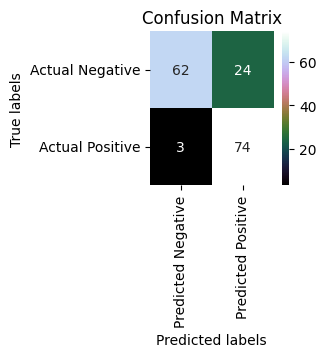

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=2)

# Fit the classifier to the training data
clf.fit(X2_train, y2_train)

# Calculate the accuracy of the classifier on the test data
accuracy4 = clf.score(X2_test, y2_test)
yG_pred = clf.predict(X2_test)
print("Accuracy :",accuracy4)
conf=confusion_matrix(y2_test, yG_pred)
print(conf)
precision4 = precision_score(y2_test,yG_pred)

print("Precision Score:",precision4 )

# Calculate recall
recall4 = recall_score(y2_test,yG_pred)

print("Recall Score:", recall4)

# Calculate F1-score
f1g = f1_score(y2_test,yG_pred)
print("F1 Score:", f1g)
roc_auc4 = roc_auc_score(y2_test, yG_pred)
print("ROC AUC score:", roc_auc4)

from sklearn.model_selection import cross_val_score

# assuming rf is your trained model and X2 and y2 are your features and labels
scores = cross_val_score(clf, X2, y2, cv=10)
print("Cross validation scores:", scores)
scores4=scores.mean()
print("Mean cross validation score:",scores4 )
plt.figure(figsize=(2,2))
sns.heatmap(conf, annot=True, cmap="cubehelix", fmt="d",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8098159509202454
Precision Score: 0.7346938775510204
Recall Score: 0.935064935064935
F1 Score: 0.822857142857143
ROC AUC score: 0.816369676834793
[[60 26]
 [ 5 72]]
Cross validation scores: [0.79268293 0.81707317 0.85185185 0.7654321  0.80246914 0.7037037
 0.77777778 0.75308642 0.77777778 0.82716049]
Mean cross validation score: 0.7869015356820235


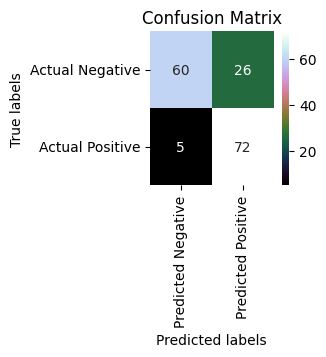

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
# Initialize and train XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1,  gamma=1, reg_alpha=1, reg_lambda=0.5, base_score=0.5, booster='gbtree', random_state=42)
xgb_classifier.fit(X2_train, y2_train)
# Predict classes
Yx_pred = xgb_classifier.predict(X2_test)

# Evaluate the model
accuracy5 = accuracy_score(y2_test, Yx_pred)
print("Accuracy:", accuracy5)

precision5 = precision_score(y2_test, Yx_pred)
print("Precision Score:", precision5)

# Calculate recall
recall5 = recall_score(y2_test, Yx_pred)
print("Recall Score:", recall5)

# Calculate F1-score
f1x = f1_score(y2_test, Yx_pred)
print("F1 Score:", f1x)
roc_auc5 = roc_auc_score(y2_test, Yx_pred)
print("ROC AUC score:", roc_auc5)
conf1=confusion_matrix(y2_test, Yx_pred)
print(conf1)
from sklearn.model_selection import cross_val_score

# assuming rf is your trained model and X2 and y2 are your features and labels
scores = cross_val_score(xgb_classifier, X2, y2, cv=10)
print("Cross validation scores:", scores)
scores5=scores.mean()
print("Mean cross validation score:",scores5 )
plt.figure(figsize=(2,2))
sns.heatmap(conf1, annot=True, cmap="cubehelix", fmt="d",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8895705521472392
[[72 14]
 [ 4 73]]
Precision Score: 0.8390804597701149
Recall Score: 0.948051948051948
F1 Score: 0.8902439024390243
ROC AUC score: 0.8926306251887647
Mean Absolute Error (MAE): 0.11042944785276074
Mean Squared Error (MSE): 0.11042944785276074
Root Mean Squared Error (RMSE): 0.3323092653730268
Cross validation scores: [0.80487805 0.91463415 0.90123457 0.86419753 0.87654321 0.81481481
 0.86419753 0.80246914 0.82716049 0.88888889]
Mean cross validation score: 0.8559018367961457


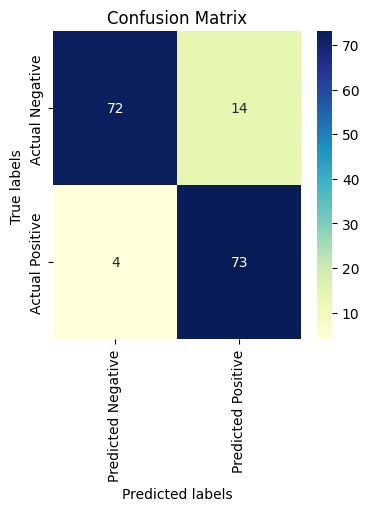

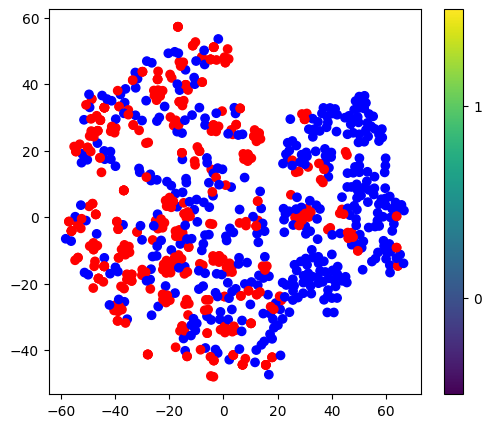

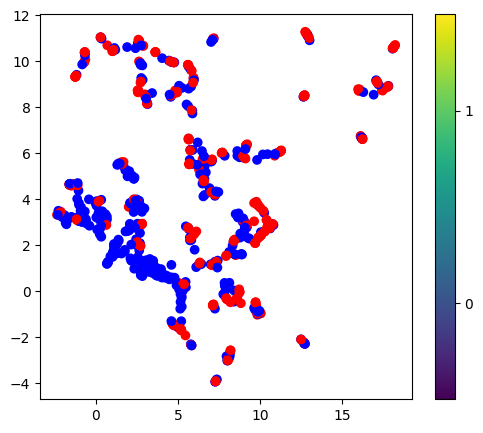

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

import numpy as np

# Step 1: Define base learners
base_learners = [
    ExtraTreesClassifier(),
    RandomForestClassifier(),
    XGBClassifier() # Adding XGBoost
]

# Step 2: Define meta learner
meta_learner = LogisticRegression()

# Step 3: Train base learners
base_learners_predictions_train = []
for learner in base_learners:
    learner.fit(X2_train, y2_train)
    base_learners_predictions_train.append(learner.predict(X2_train))

# Step 4: Train meta learner
meta_learner_input_train = np.column_stack(base_learners_predictions_train)
meta_learner.fit(meta_learner_input_train, y2_train)

# Step 4: Testing
base_learners_predictions_test = []
for learner in base_learners:
    base_learners_predictions_test.append(learner.predict(X2_test))

meta_learner_input_test = np.column_stack(base_learners_predictions_test)
final_predictions = meta_learner.predict(meta_learner_input_test)

# Evaluate final predictions
accuracy6 = accuracy_score(y2_test, final_predictions)
print("Accuracy:", accuracy6)

conf_matrix = confusion_matrix(y2_test,final_predictions )

print(conf_matrix)
precision6 = precision_score(y2_test, final_predictions)
print("Precision Score:",precision6 )

# Calculate recall
recall6 = recall_score(y2_test, final_predictions)
print("Recall Score:", recall6 )

# Calculate F1-score
f1s = f1_score(y2_test, final_predictions)
print("F1 Score:", f1s)
roc_auc6 = roc_auc_score(y2_test, final_predictions)
print("ROC AUC score:", roc_auc6)
mae = mean_absolute_error(y2_test, final_predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate MSE
mse = mean_squared_error(y2_test, final_predictions)
print("Mean Squared Error (MSE):", mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


from sklearn.model_selection import cross_val_score

# assuming rf is your trained model and X2 and y2 are your features and labels
scores = cross_val_score(learner, X2, y2, cv=10)
print("Cross validation scores:", scores)
scores6=scores.mean()
print("Mean cross validation score:",scores6 )

plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="d",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
labels = ['blue' if label == 0 else 'red' for label in y2]

# Create a t-SNE plot
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X2)

plt.figure(figsize=(6, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
plt.colorbar(ticks=[0, 1])
plt.clim(-0.5, 1.5)
plt.show()

# Reduce dimensionality using t-SNE
# Create a UMAP plot
umap_plot = umap.UMAP(n_neighbors=10, min_dist=0.1, metric='euclidean')
X_umap = umap_plot.fit_transform(X2)

plt.figure(figsize=(6, 5))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels)
plt.colorbar(ticks=[0, 1])
plt.clim(-0.5, 1.5)
plt.show()

Accuracy: 0.9325153374233128
[[79  7]
 [ 4 73]]
Precision Score: 0.9125
Recall Score: 0.948051948051948
F1 Score: 0.929936305732484
ROC AUC score: 0.9333282996073694
Mean Absolute Error (MAE): 0.06748466257668712
Mean Squared Error (MSE): 0.06748466257668712
Root Mean Squared Error (RMSE): 0.25977810257349854
Cross validation scores: [0.90243902 0.91463415 0.9382716  0.91358025 0.92592593 0.92592593
 0.92592593 0.85185185 0.9382716  0.9382716 ]
Mean cross validation score: 0.9175097862089732


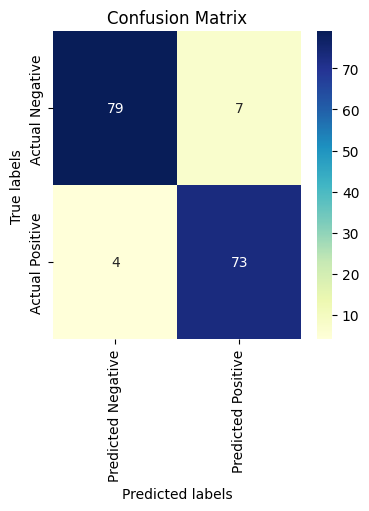

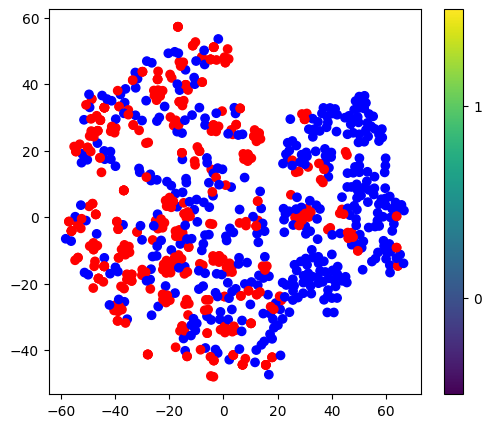

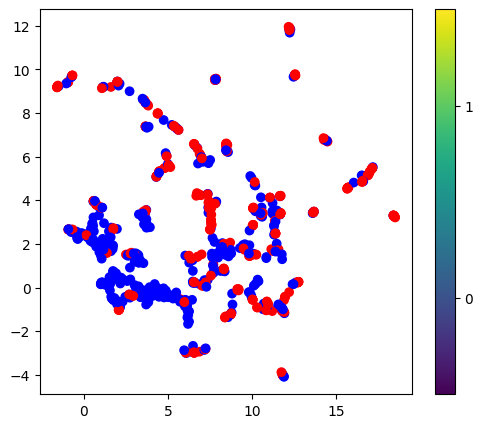

Prediction: The person is predicted to have liver disease.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature

In [ ]:
import numpy as np
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.manifold import TSNE
import umap
# Define the base learners
base_learners = [
    ('SVM', SVC(random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Extra Tree', ExtraTreesClassifier(n_estimators=100,random_state=42)),
    ('Random Forest', RandomForestClassifier(n_estimators=100,random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('Bagging', BaggingClassifier(n_estimators=100,random_state=42)),
    ('GradientBoosting', GradientBoostingClassifier(random_state=42)),
    ('DecisionTree', DecisionTreeClassifier())
]

# Define the meta learner
meta_learner = LogisticRegression(random_state=42)

# Create the stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5
)

# Train the stacking classifier
stacking_clf.fit(X2_train, y2_train)

# Make predictions on the testing set
ys_pred = stacking_clf.predict(X2_test)

# Evaluate the performance of the stacking classifier
accuracy7 = accuracy_score(y2_test, ys_pred)
print("Accuracy:", accuracy7)

conf_matrix = confusion_matrix(y2_test,ys_pred )

print(conf_matrix)
precision7 = precision_score(y2_test, ys_pred)
print("Precision Score:",precision7 )

# Calculate recall
recall7 = recall_score(y2_test, ys_pred)
print("Recall Score:", recall7 )

# Calculate F1-score
f1m = f1_score(y2_test, ys_pred)
print("F1 Score:", f1m)
roc_auc7 = roc_auc_score(y2_test, ys_pred)
print("ROC AUC score:", roc_auc7)
mae = mean_absolute_error(y2_test, ys_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate MSE
mse = mean_squared_error(y2_test, ys_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

from sklearn.model_selection import cross_val_score

# assuming rf is your trained model and X2 and y2 are your features and labels
scores = cross_val_score(stacking_clf, X2, y2, cv=10)
print("Cross validation scores:", scores)
scores7=scores.mean()
print("Mean cross validation score:",scores7 )


plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="d",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

labels = ['blue' if label == 0 else 'red' for label in y2]

# Create a t-SNE plot
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X2)

plt.figure(figsize=(6, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
plt.colorbar(ticks=[0, 1])
plt.clim(-0.5, 1.5)
plt.show()

# Reduce dimensionality using t-SNE
# Create a UMAP plot
umap_plot = umap.UMAP(n_neighbors=10, min_dist=0.1, metric='euclidean')
X_umap = umap_plot.fit_transform(X2)

plt.figure(figsize=(6, 5))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels)
plt.colorbar(ticks=[0, 1])
plt.clim(-0.5, 1.5)
plt.show()


def predict_liver_disease(Alkaline_Phosphotase, Aspartate_Aminotransferase, Alamine_Aminotransferase, Albumin_and_Globulin_Ratio, Age):
    input_data = np.array([[Alkaline_Phosphotase, Aspartate_Aminotransferase, Alamine_Aminotransferase, Albumin_and_Globulin_Ratio, Age]])
    prediction = stacking_clf.predict(input_data)
    if prediction[0] == 2:
        return "The person is predicted to not have liver disease"
    else:
        return "The person is predicted to have liver disease."

# Example usage
Alkaline_Phosphotase = 100
Aspartate_Aminotransferase = 300
Alamine_Aminotransferase = 260
Albumin_and_Globulin_Ratio = 160
Age = 45

prediction = predict_liver_disease(Alkaline_Phosphotase, Aspartate_Aminotransferase, Alamine_Aminotransferase, Albumin_and_Globulin_Ratio, Age)
print("Prediction:", prediction)


In [ ]:
print("| Model             | Accuracy                      | Precision                           | Recall                     |")
print("|-----------------  |-------------------------------|-------------------------------------|----------------------------|")
print(f"| Random Forest     | {accuracy1}            | {precision1}                  | {recall1}          |")
print(f"| Extra Tree Forest | {accuracy2}            | {precision2}                  | {recall2}          |")
print(f"| Bagging           | {accuracy3}            | {precision3}                  | {recall3}          |")
print(f"| Gradient boosting | {accuracy4}            | {precision4}                         | {recall4}         |")
print(f"| xgboosting        | {accuracy5}            | {precision5}                  | {recall5}          |")
print(f"| stacking          | {accuracy6}            | {precision6}                  | {recall6}          |")
print(f"| new model         | {accuracy7}             | {precision7}                                | {recall7}          |")


| Model             | Accuracy                      | Precision                           | Recall                     |
|-----------------  |-------------------------------|-------------------------------------|----------------------------|
| Random Forest     | 0.8711656441717791            | 0.8111111111111111                  | 0.948051948051948          |
| Extra Tree Forest | 0.9141104294478528            | 0.8705882352941177                  | 0.961038961038961          |
| Bagging           | 0.8404907975460123            | 0.7684210526315789                  | 0.948051948051948          |
| Gradient boosting | 0.8343558282208589            | 0.7551020408163265                         | 0.961038961038961         |
| xgboosting        | 0.8098159509202454            | 0.7346938775510204                  | 0.935064935064935          |
| stacking          | 0.8895705521472392            | 0.8390804597701149                  | 0.948051948051948          |
| new model         | 0.93

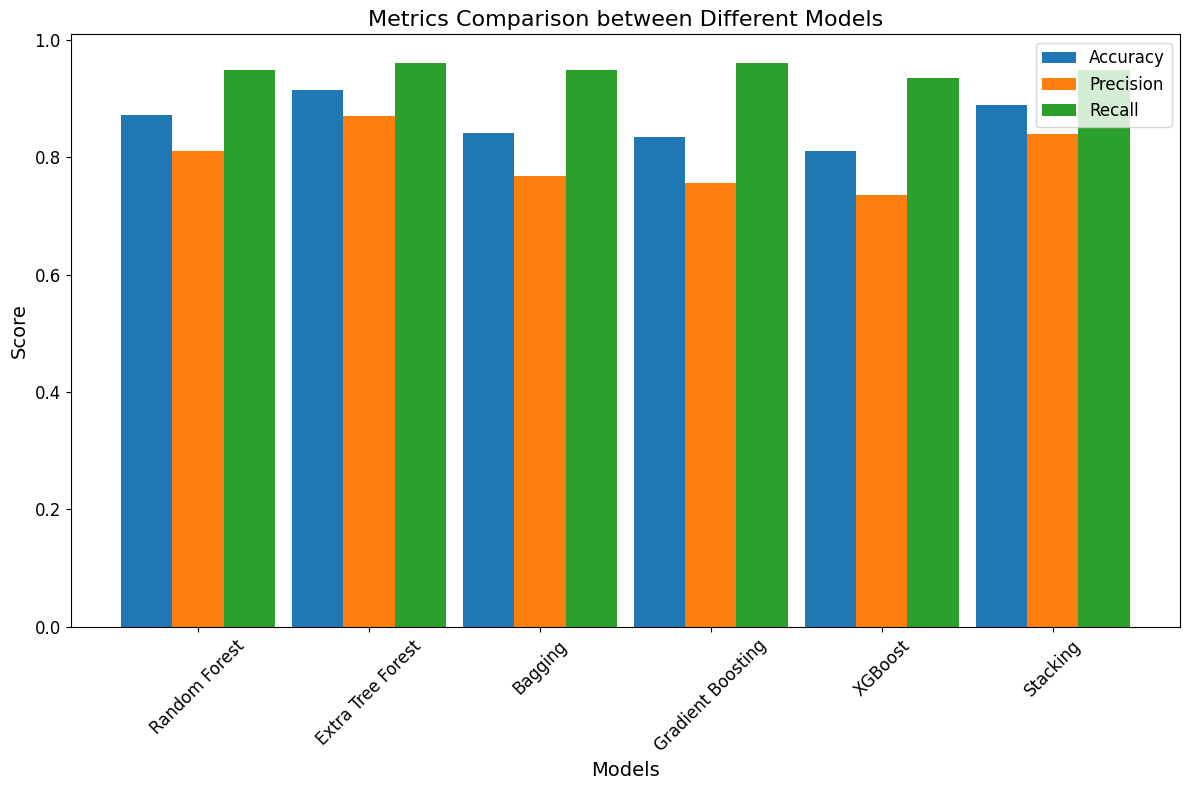

In [ ]:
import matplotlib.pyplot as plt

# Define model names
models = ['Random Forest', 'Extra Tree Forest', 'Bagging', 'Gradient Boosting', 'XGBoost', 'Stacking']

# Define metric values for each model
accuracy = [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6]
precision = [precision1, precision2, precision3, precision4, precision5, precision6]
recall = [recall1, recall2, recall3, recall4, recall5, recall6]

# Define the width of each bar
bar_width = 0.3

# Set up the positions for the bars
index = range(len(models))

# Plot each metric
plt.figure(figsize=(12, 8))

plt.bar(index, accuracy, bar_width, label='Accuracy')
plt.bar([i + bar_width for i in index], precision, bar_width, label='Precision')
plt.bar([i + 2 * bar_width for i in index], recall, bar_width, label='Recall')

# Add labels and title
plt.xlabel('Models', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Metrics Comparison between Different Models', fontsize=16)
plt.xticks([i + bar_width for i in index], models, fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


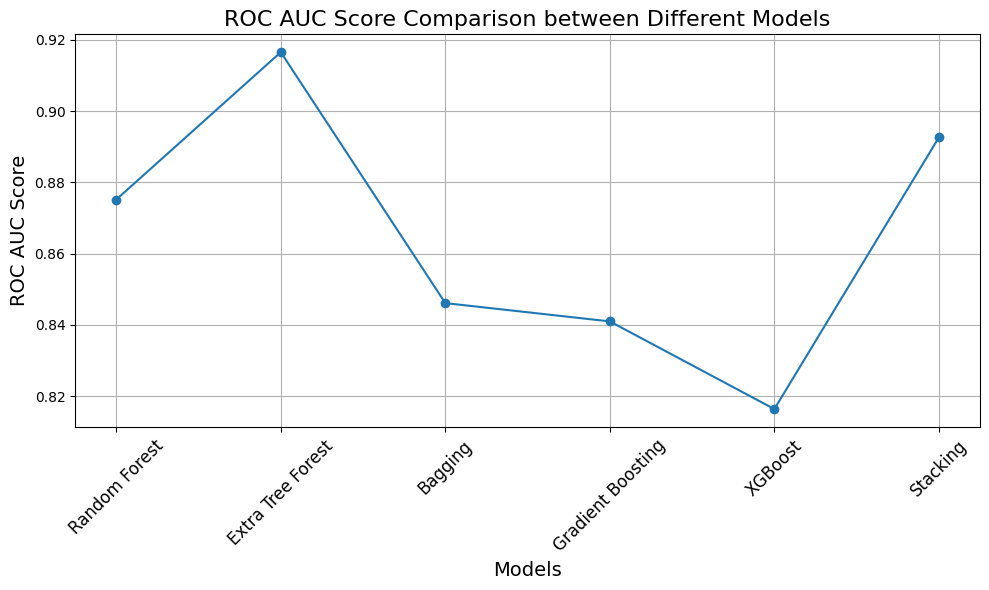

In [ ]:
import matplotlib.pyplot as plt

# Define model names
models = ['Random Forest', 'Extra Tree Forest', 'Bagging', 'Gradient Boosting', 'XGBoost', 'Stacking']

# Define ROC AUC scores for each model
roc_auc_scores = [roc_auc1, roc_auc2, roc_auc3, roc_auc4, roc_auc5, roc_auc6]

# Set up the positions for the points on the x-axis
x_pos = range(1, len(models) + 1)

# Plot ROC AUC scores for each model
plt.figure(figsize=(10, 6))
plt.plot(x_pos, roc_auc_scores, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Models', fontsize=14)
plt.ylabel('ROC AUC Score', fontsize=14)
plt.title('ROC AUC Score Comparison between Different Models', fontsize=16)
plt.xticks(x_pos, models, fontsize=12, rotation=45)
plt.grid()

# Show plot
plt.tight_layout()
plt.show()


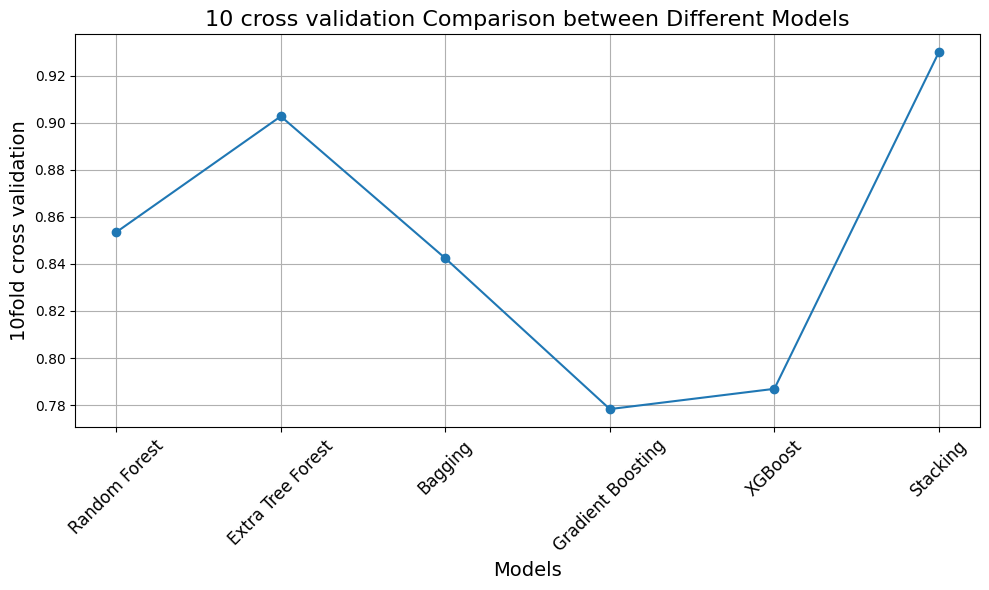

In [ ]:
import matplotlib.pyplot as plt

# Define model names
models = ['Random Forest', 'Extra Tree Forest', 'Bagging', 'Gradient Boosting', 'XGBoost', 'Stacking']
score13=0.93
# Define ROC AUC scores for each model
score = [scores1, scores2, scores3, scores4, scores5, score13]

# Set up the positions for the points on the x-axis
x_pos = range(1, len(models) + 1)

# Plot ROC AUC scores for each model
plt.figure(figsize=(10, 6))
plt.plot(x_pos, score, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Models', fontsize=14)
plt.ylabel('10fold cross validation', fontsize=14)
plt.title('10 cross validation Comparison between Different Models', fontsize=16)
plt.xticks(x_pos, models, fontsize=12, rotation=45)
plt.grid()

# Show plot
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'streamlit'